In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")

# load data
path = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
df = pd.read_csv(path).rename(columns=clear_cols)


In [3]:
print(f"Shape of the file: {df.shape}")
df.head()

Shape of the file: (5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [39]:
print(f"duplicates -> {df.duplicated().sum()}\n")
print(f"null values: \n{df.isnull().sum()}")

duplicates -> 0

null values: 
Provider          0
PotentialFraud    0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [7]:
df['PotentialFraud'].value_counts()

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

In [40]:
# presentage of missing values
df.isna().sum()/len(df) *100

Provider          0.0
PotentialFraud    0.0
dtype: float64

In [10]:
df['Provider'].nunique()

5410

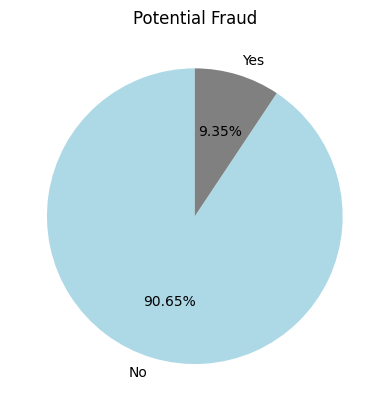

In [37]:
plt.pie(df['PotentialFraud'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%',startangle=90,colors=['lightblue','gray'])
plt.title('Potential Fraud')
plt.show()

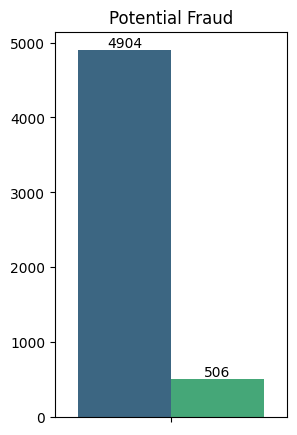

In [33]:
# plot the difference between the fraud and non-fraud providers
plt.figure(figsize=(3,5))
ax = sns.barplot(hue=df['PotentialFraud'].value_counts().index, y=df['PotentialFraud'].value_counts().values, palette='viridis',legend=False)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Potential Fraud')
plt.show()